<a href="https://www.kaggle.com/code/utkarshx27/mpox-monkeypox-dataset-analysis?scriptVersionId=129378862" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mpox-monkeypox-data/owid-monkeypox-data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/mpox-monkeypox-data/owid-monkeypox-data.csv')
df.head()

,location,iso_code,date,total_cases,total_deaths,new_cases,new_deaths,new_cases_smoothed,new_deaths_smoothed,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million
0,Africa,OWID_AFR,2022-05-01,27.0,2.0,0.0,0.0,0.29,0.0,0.0,0.019,0.0,0.0,0.0014,0.0
1,Africa,OWID_AFR,2022-05-02,27.0,2.0,0.0,0.0,0.29,0.0,0.0,0.019,0.0,0.0,0.0014,0.0
2,Africa,OWID_AFR,2022-05-03,27.0,2.0,0.0,0.0,0.29,0.0,0.0,0.019,0.0,0.0,0.0014,0.0
3,Africa,OWID_AFR,2022-05-04,27.0,2.0,0.0,0.0,0.29,0.0,0.0,0.019,0.0,0.0,0.0014,0.0
4,Africa,OWID_AFR,2022-05-05,27.0,2.0,0.0,0.0,0.29,0.0,0.0,0.019,0.0,0.0,0.0014,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33666 entries, 0 to 33665
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   location                         33666 non-null  object 
 1   iso_code                         33666 non-null  object 
 2   date                             33666 non-null  object 
 3   total_cases                      33666 non-null  float64
 4   total_deaths                     33666 non-null  float64
 5   new_cases                        33666 non-null  float64
 6   new_deaths                       33666 non-null  float64
 7   new_cases_smoothed               33666 non-null  float64
 8   new_deaths_smoothed              33666 non-null  float64
 9   new_cases_per_million            33666 non-null  float64
 10  total_cases_per_million          33666 non-null  float64
 11  new_cases_smoothed_per_million   33666 non-null  float64
 12  new_deaths_per_mil

In [5]:
df.describe()

,total_cases,total_deaths,new_cases,new_deaths,new_cases_smoothed,new_deaths_smoothed,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million
count,33666.000000,33666.000000,33666.000000,33666.000000,33666.000000,33666.000000,33666.000000,33666.000000,33666.000000,33666.000000,33666.000000,33666.000000
mean,1938.869809,1.708489,7.783728,0.012297,7.781165,0.012120,0.078259,19.725986,0.077846,0.000081,0.011195,0.000080
std,8459.303549,8.497967,63.686045,0.216703,49.289572,0.088667,0.923805,30.910935,0.394291,0.002657,0.041827,0.000991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.680000,0.000000,0.000000,0.000000,0.000000
50%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.878000,0.000000,0.000000,0.000000,0.000000
75%,257.000000,0.000000,0.000000,0.000000,0.570000,0.000000,0.000000,29.362250,0.025000,0.000000,0.000000,0.000000
max,87376.000000,140.000000,1802.000000,12.000000,1089.140000,1.710000,91.808000,183.615000,17.443000,0.226830,0.587380,0.031760


In [6]:
correlation = df[['total_cases', 'total_deaths']].corr()
print(correlation)

              total_cases  total_deaths
total_cases      1.000000      0.860625
total_deaths     0.860625      1.000000


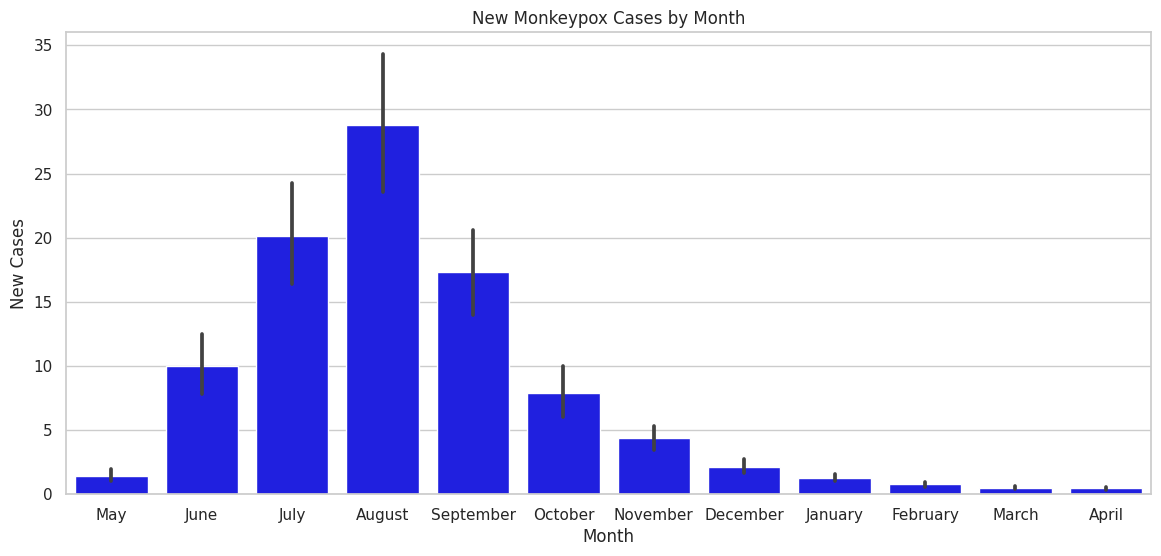

In [7]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month.apply(lambda x: calendar.month_name[x])
sns.set(rc={'figure.figsize':(14,6)})
sns.set_style("whitegrid")
sns.barplot(x='month', y='new_cases', data=df, color='blue')
plt.title('New Monkeypox Cases by Month')
plt.xlabel('Month')
plt.ylabel('New Cases')

plt.show()

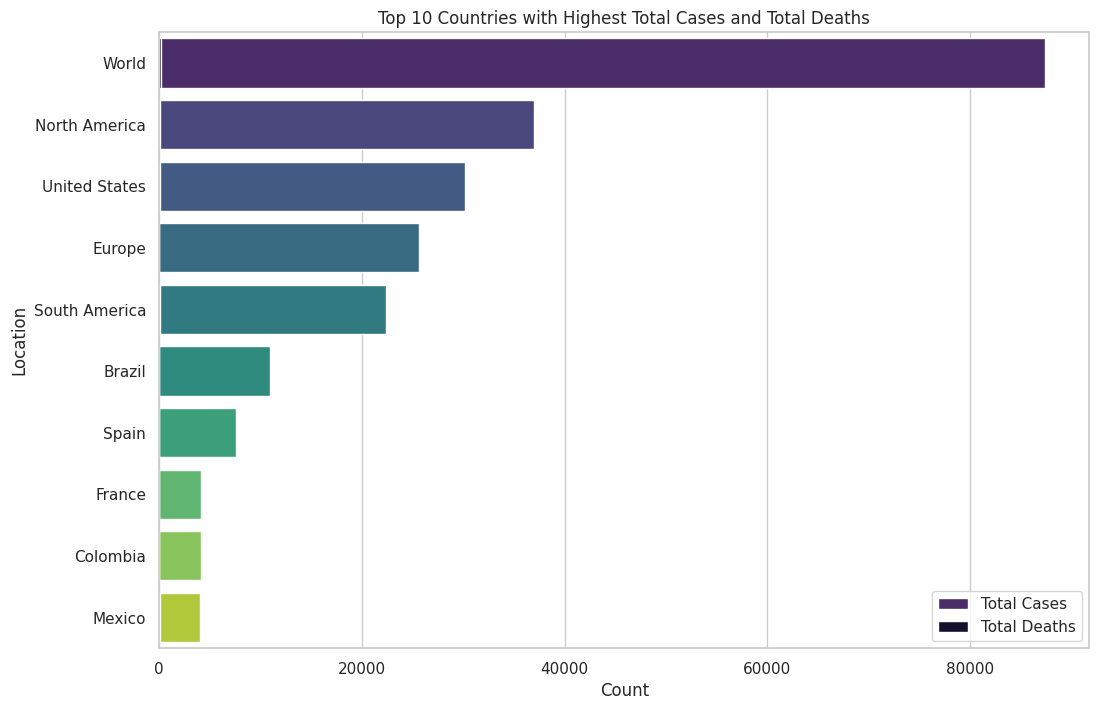

In [8]:
grouped_data = df.groupby('location').agg({'total_cases': 'max', 'total_deaths': 'max'}).reset_index()
grouped_data = grouped_data[grouped_data['total_cases'] > 0]
top_10_countries = grouped_data.sort_values('total_cases', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='total_cases', y='location', data=top_10_countries, palette='viridis', label='Total Cases')
sns.barplot(x='total_deaths', y='location', data=top_10_countries, palette='magma', label='Total Deaths')
plt.xlabel('Count')
plt.ylabel('Location')
plt.title('Top 10 Countries with Highest Total Cases and Total Deaths')
plt.legend()
plt.show()

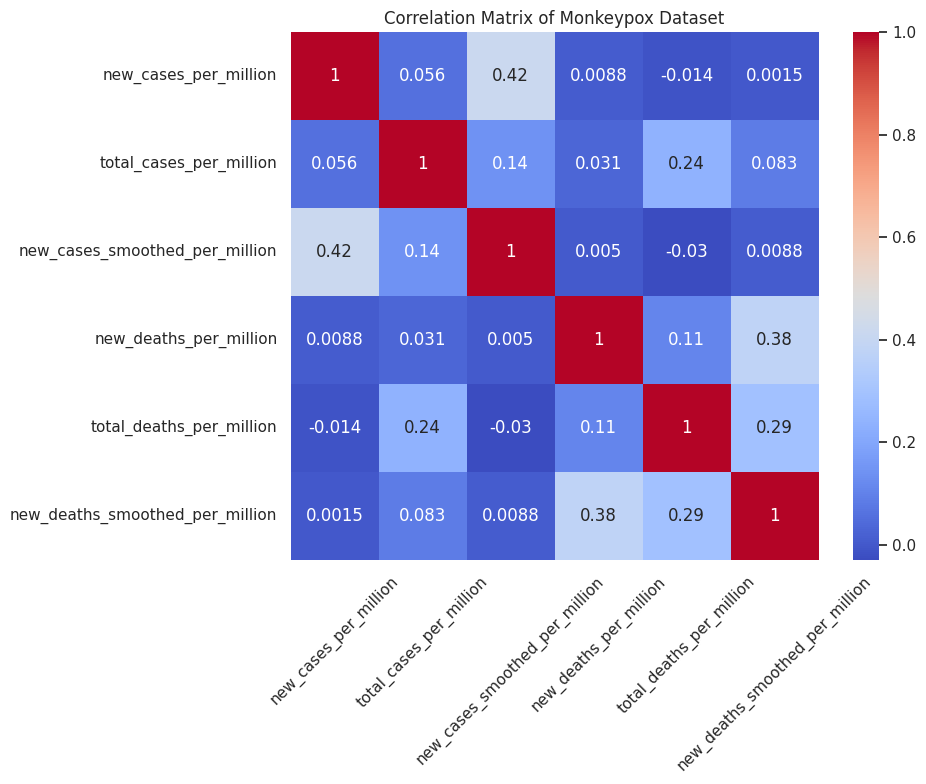

In [9]:
numerical_columns = ['new_cases_per_million', 'total_cases_per_million',
                     'new_cases_smoothed_per_million', 'new_deaths_per_million',
                     'total_deaths_per_million', 'new_deaths_smoothed_per_million']
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Monkeypox Dataset')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipykernel_20/1694086355.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


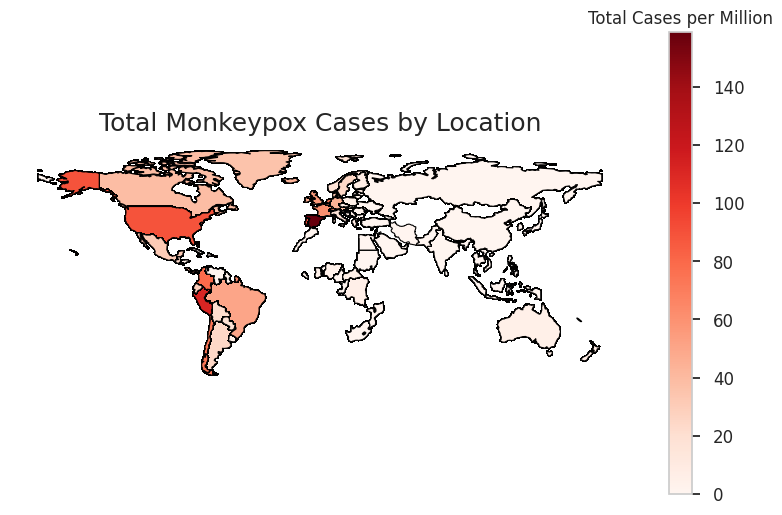

In [10]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.merge(df, left_on='iso_a3', right_on='iso_code')
plt.style.use('seaborn-talk')
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Total Monkeypox Cases by Location', fontsize=18)
merged.plot(column='total_cases_per_million', cmap='Reds', linewidth=0.8, edgecolor='black', ax=ax, legend=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
cax = fig.axes[-1]
cax.tick_params(labelsize=12)

ax.set_axis_off()
cax.set_title('Total Cases per Million', fontsize=12)
plt.savefig('monkeypox_map.png', bbox_inches='tight', dpi=300)
plt.show()

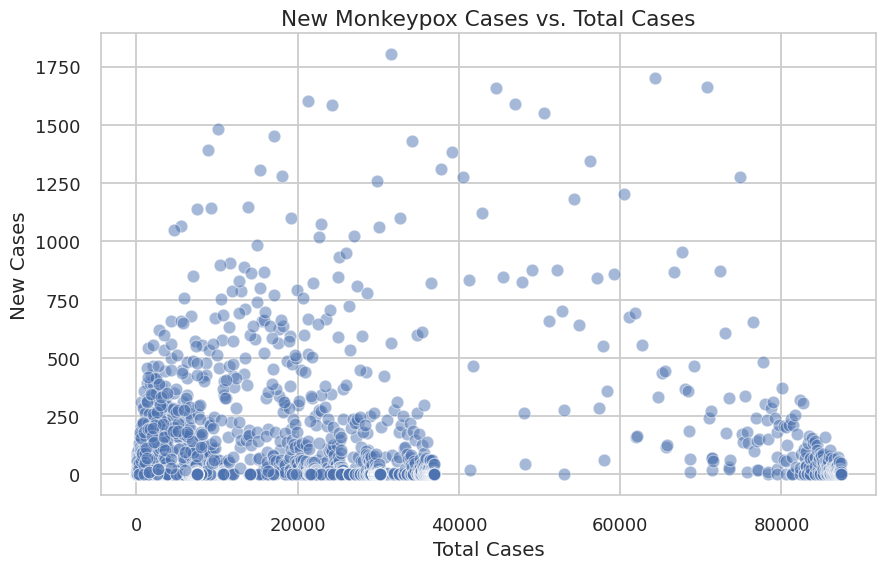

In [11]:
df_subset = df[['total_cases', 'new_cases']]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_cases', y='new_cases', data=df_subset, alpha=0.5)
plt.title('New Monkeypox Cases vs. Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('New Cases')
plt.show()

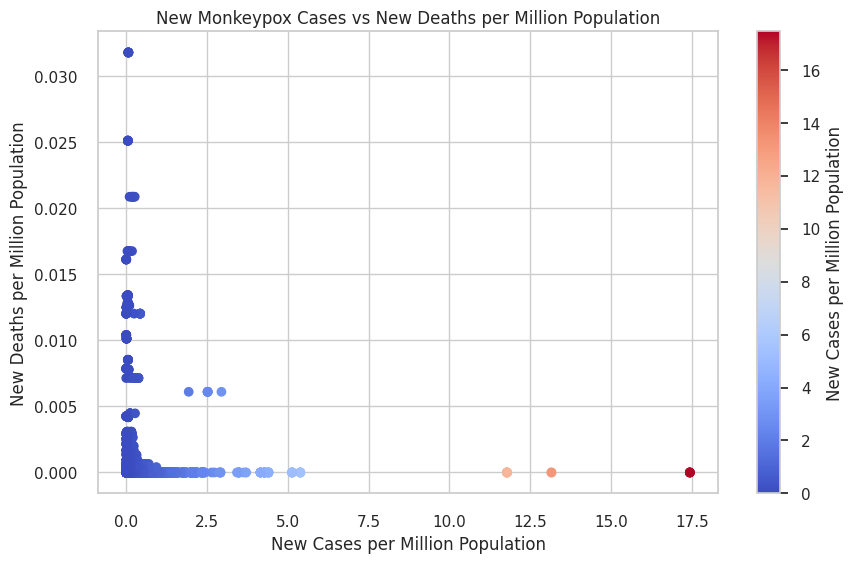

In [12]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("whitegrid")
plt.scatter(x='new_cases_smoothed_per_million', y='new_deaths_smoothed_per_million', c='new_cases_smoothed_per_million',
            cmap='coolwarm', data=df)
cbar = plt.colorbar()
cbar.set_label('New Cases per Million Population')
plt.title('New Monkeypox Cases vs New Deaths per Million Population')
plt.xlabel('New Cases per Million Population')
plt.ylabel('New Deaths per Million Population')
plt.show()